In [32]:
"""
Consider the Bangalore House Price Data. Perform following operations. 
a) Find and replace null values in the data using appropriate technique. 
b) Transform the ‘Size’ column to numerical values. For Example: 2 BHK to be converted as 2 
c) Transform the ‘total_sqft’ column to contain numerical values on same scale. If the range is given average value of 
the range to be taken. 
d) Calculate and add one more column as ‘Price_Per_Sqft’ 
e) Remove the outliers from Price_Per_Sqft and BHK Size column if any. 
f) Apply the Linear Regression model to the data and display the training and testing performance measures as Mean 
Squared Error and Accuracy
"""

'\nConsider the Bangalore House Price Data. Perform following operations. \na) Find and replace null values in the data using appropriate technique. \nb) Transform the ‘Size’ column to numerical values. For Example: 2 BHK to be converted as 2 \nc) Transform the ‘total_sqft’ column to contain numerical values on same scale. If the range is given average value of \nthe range to be taken. \nd) Calculate and add one more column as ‘Price_Per_Sqft’ \ne) Remove the outliers from Price_Per_Sqft and BHK Size column if any. \nf) Apply the Linear Regression model to the data and display the training and testing performance measures as Mean \nSquared Error and Accuracy\n'

In [134]:
import pandas as pd
import numpy as np

In [135]:
df= pd.read_csv("Banglore Housing Prices.csv")
df.sample(5)

,location,size,total_sqft,bath,price
9126,Kengeri,2 BHK,1009,2.0,30.27
2155,Ramagondanahalli,2 BHK,1235,2.0,46.80
12572,Harlur,4 BHK,2990,4.0,225.00
5747,Kanakpura Road,1 BHK,525,NaN,27.00
645,Haralur Road,2 BHK,1194,2.0,47.00


In [136]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [137]:
df.shape

(13320, 5)

In [138]:
df.dropna(inplace=True)

In [139]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [140]:
df.shape

(13246, 5)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13246 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  object 
 2   total_sqft  13246 non-null  object 
 3   bath        13246 non-null  float64
 4   price       13246 non-null  float64
dtypes: float64(2), object(3)
memory usage: 620.9+ KB


In [142]:
df['size'].value_counts()

size
2 BHK         5198
3 BHK         4286
4 Bedroom      818
4 BHK          577
3 Bedroom      546
1 BHK          531
2 Bedroom      329
5 Bedroom      296
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           57
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [143]:
df['size'] = [int(value.split(' ')[0]) for value in df['size']]

In [144]:
df['size'].value_counts()

size
2     5527
3     4832
4     1395
1      649
5      353
6      221
7      100
8       89
9       54
10      14
11       4
27       1
19       1
16       1
43       1
14       1
12       1
13       1
18       1
Name: count, dtype: int64

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13246 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  int64  
 2   total_sqft  13246 non-null  object 
 3   bath        13246 non-null  float64
 4   price       13246 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 620.9+ KB


In [146]:
df['total_sqft'].sample(10)

8170            2750
576             1230
11787           1115
6518            1250
1217            1560
3947     3369 - 3464
12772           1234
6009             900
7493            2134
12562           1194
Name: total_sqft, dtype: object

In [153]:
def convert_sqrt(value):
    try:
        if '-' in value:
            start,end = map(float , value.split('-'))
            return (start + end)/2
        else:
            return float(value)
    except ValueError:
        return float('nan')

In [154]:
df['total_sqft'] = [ convert_sqrt(value) for value in df['total_sqft']]

In [155]:
df['total_sqft']

0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13315    3453.0
13316    3600.0
13317    1141.0
13318    4689.0
13319     550.0
Name: total_sqft, Length: 13246, dtype: float64

In [156]:
df['total_sqft'].isnull().sum()

46

In [160]:
df.dropna(inplace = True)

In [161]:
df['total_sqft'].isnull().sum()

0

In [162]:
df['Price_Per_Sqft'] = df['price']/df['total_sqft']

In [163]:
df['Price_Per_Sqft']

0        0.036998
1        0.046154
2        0.043056
3        0.062459
4        0.042500
           ...   
13315    0.066898
13316    0.111111
13317    0.052585
13318    0.104073
13319    0.030909
Name: Price_Per_Sqft, Length: 13200, dtype: float64

<h2>Remove Outliars</h2>

In [164]:
import seaborn as sns

In [168]:
df['Price_Per_Sqft'].describe()

count    13200.000000
mean         0.079208
std          1.067272
min          0.002678
25%          0.042677
50%          0.054383
75%          0.073171
max        120.000000
Name: Price_Per_Sqft, dtype: float64

<AxesSubplot:xlabel='Price_Per_Sqft'>

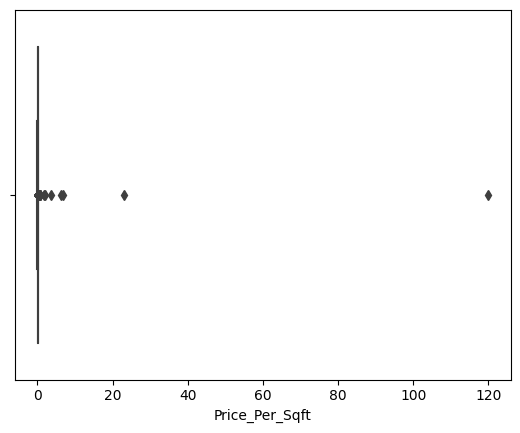

In [169]:
sns.boxplot(x = df['Price_Per_Sqft'])

In [170]:
df['size'].describe()

count    13200.000000
mean         2.800833
std          1.292843
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         43.000000
Name: size, dtype: float64

<AxesSubplot:xlabel='size'>

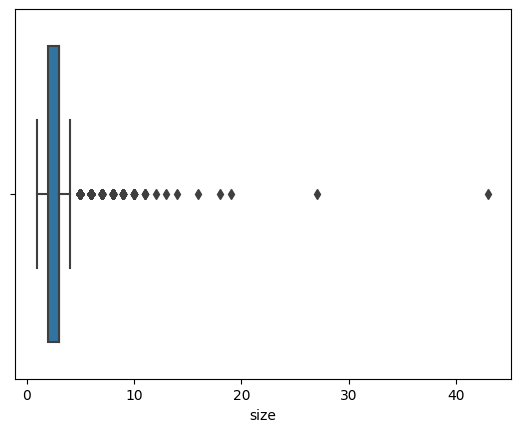

In [167]:
sns.boxplot(x=df['size'])

In [173]:
def remove_outliars(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR
    return data[(data >= lower) & ( data <= upper)]

In [175]:
df['size'] = remove_outliars(df['size'])

In [176]:
df['size'].describe()

count    12365.000000
mean         2.562717
std          0.757931
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          4.000000
Name: size, dtype: float64

<AxesSubplot:xlabel='size'>

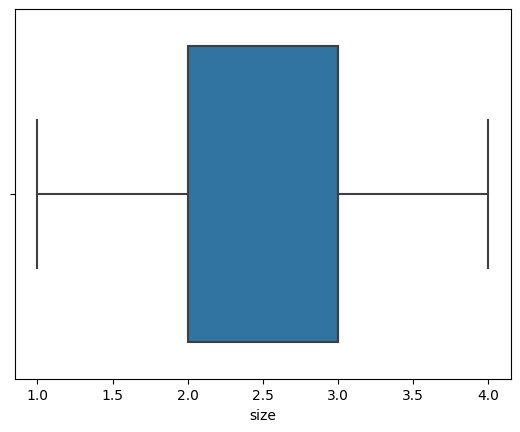

In [177]:
sns.boxplot(x=df['size'])

In [178]:
df['Price_Per_Sqft'] = remove_outliars(df['Price_Per_Sqft'])

In [179]:
df['Price_Per_Sqft'].describe()

count    11935.000000
mean         0.055764
std          0.019578
min          0.002678
25%          0.041667
50%          0.051887
75%          0.066033
max          0.118750
Name: Price_Per_Sqft, dtype: float64

<AxesSubplot:xlabel='Price_Per_Sqft'>

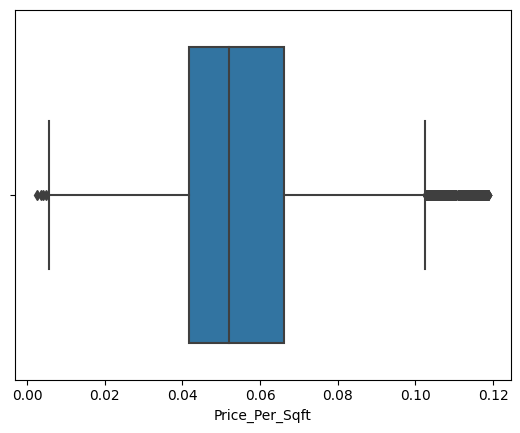

In [180]:
sns.boxplot(x = df['Price_Per_Sqft'])

In [181]:
df['Price_Per_Sqft'] = remove_outliars(df['Price_Per_Sqft'])

<AxesSubplot:xlabel='Price_Per_Sqft'>

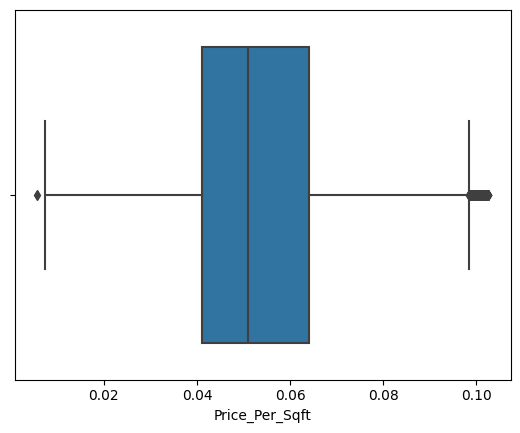

In [182]:
sns.boxplot(x = df['Price_Per_Sqft'])

In [183]:
df.isnull().sum()

location             0
size               835
total_sqft           0
bath                 0
price                0
Price_Per_Sqft    1693
dtype: int64

In [184]:
df['size'] = df['size'].fillna(df['size'].mean())

In [185]:
df['Price_Per_Sqft'] = df['Price_Per_Sqft'].fillna(df['Price_Per_Sqft'].mean())

In [186]:
df.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
Price_Per_Sqft    0
dtype: int64

<h1>Applying linear Regression</h1>

In [197]:
X = df[['Price_Per_Sqft','bath','total_sqft','size']]
y = df['price']

In [198]:
X

,Price_Per_Sqft,bath,total_sqft,size
0,0.036998,2.0,1056.0,2.000000
1,0.046154,5.0,2600.0,4.000000
2,0.043056,2.0,1440.0,3.000000
3,0.062459,3.0,1521.0,3.000000
4,0.042500,2.0,1200.0,2.000000
...,...,...,...,...
13315,0.066898,4.0,3453.0,2.562717
13316,0.053780,5.0,3600.0,4.000000
13317,0.052585,2.0,1141.0,2.000000
13318,0.053780,4.0,4689.0,4.000000


In [199]:
y

0         39.07
1        120.00
2         62.00
3         95.00
4         51.00
          ...  
13315    231.00
13316    400.00
13317     60.00
13318    488.00
13319     17.00
Name: price, Length: 13200, dtype: float64

In [209]:
from sklearn.model_selection import train_test_split,cross_val_score

In [201]:
x_tarin , x_test , y_train , y_test = train_test_split(X , y ,test_size = 0.25 , random_state = 5)

In [202]:
from sklearn.linear_model import LinearRegression

In [203]:
model = LinearRegression()

In [204]:
model.fit(x_tarin,y_train)

LinearRegression()

In [205]:
y_pred = model.predict(x_test)

In [206]:
from sklearn.metrics import r2_score,mean_squared_error

In [207]:
mse = mean_squared_error(y_test , y_pred)

In [210]:
cv = np.mean(cross_val_score(model , X , y ,cv=5))

In [211]:
print('mean squared error ',mse)

mean squared error  11210.150204458254


In [ ]:
print('R squared ',)